get data (로이터 dataset)

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 1us/step


In [2]:
type(train_data)

numpy.ndarray

In [3]:
print(len(train_data), len(test_data))

8982 2246


In [4]:
print(train_data[0])
print(train_labels)

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[ 3  4  3 ... 25  3 25]


In [5]:
print(max(train_labels))

45


In [6]:
print( max([len(el) for el in train_data]) )
print( min([len(el) for el in train_data]) )

2376
13


convert to text (word decoding)

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([ (value, key) for (key, value) in word_index.items() ])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]  ])
decoded_newswire

557056/550378 [==============================] - 1s 2us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

reday for data

- we cant inject numeric list to NN. so need to change list to tensor.
- there are two ways to make change.
- first method is Embedding
- second method is One-hot encoding
- in this section, we will use One-hot encoding

In [16]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다        
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

conver label data using one-hot encoding

이미 keras에 one-hot 을 잘해주는놈이 있음...

In [17]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

make model

In [10]:
from keras import models
from keras import layers
from keras import activations

model = models.Sequential()
model.add(layer=layers.Dense(64, activation=activations.relu, input_shape=(10000, ) ))
model.add(layer=layers.Dense(64, activation=activations.relu))
model.add(layer=layers.Dense(46, activation=activations.softmax))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(),
              loss = losses.categorical_crossentropy,
              metrics = [metrics.categorical_accuracy]
             )

In [13]:
history = model.fit(x_train,
                    one_hot_train_labels,
                    batch_size=512,
                    epochs=20,
                    validation_split=0.1
                   )

Instructions for updating:
Use tf.cast instead.
Train on 8083 samples, validate on 899 samples
Epoch 1/20
8083/8083 [==============================] - 2s 305us/step - loss: 2.5390 - categorical_accuracy: 0.4842 - val_loss: 1.8126 - val_categorical_accuracy: 0.6107
Epoch 2/20
8083/8083 [==============================] - 0s 61us/step - loss: 1.4388 - categorical_accuracy: 0.6879 - val_loss: 1.4359 - val_categorical_accuracy: 0.6841
Epoch 3/20
8083/8083 [==============================] - 0s 57us/step - loss: 1.0857 - categorical_accuracy: 0.7669 - val_loss: 1.2752 - val_categorical_accuracy: 0.7186
Epoch 4/20
8083/8083 [==============================] - 0s 55us/step - loss: 0.8621 - categorical_accuracy: 0.8170 - val_loss: 1.1681 - val_categorical_accuracy: 0.7486
Epoch 5/20
8083/8083 [==============================] - 0s 58us/step - loss: 0.6900 - categorical_accuracy: 0.8546 - val_loss: 1.0987 - val_categorical_accuracy: 0.7531
Epoch 6/20
8083/8083 [==============================] - 0s 

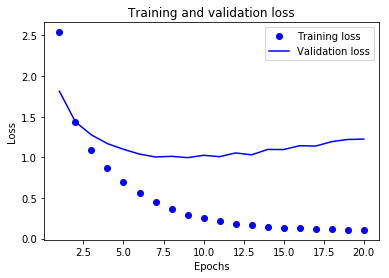

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

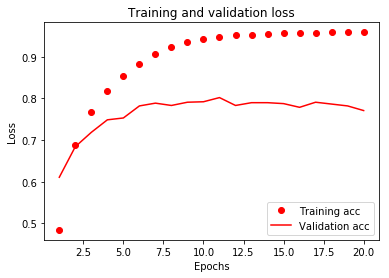

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

make new best model

In [16]:
from keras import *

model = models.Sequential()
model.add(layer=layers.Dense(64, activation=activations.relu, input_shape=(10000, ) ))
model.add(layer=layers.Dense(64, activation=activations.relu))
model.add(layer=layers.Dense(46, activation=activations.softmax))


model.compile(optimizer=optimizers.RMSprop(),
              loss = losses.categorical_crossentropy,
              metrics = [metrics.categorical_accuracy]
             )

history = model.fit(x_train,
                    one_hot_train_labels,
                    batch_size=512,
                    epochs=9,  # early stopping
                    validation_split=0.1
                   )

results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 8083 samples, validate on 899 samples
Epoch 1/9
8083/8083 [==============================] - 1s 74us/step - loss: 2.4438 - categorical_accuracy: 0.5456 - val_loss: 1.6969 - val_categorical_accuracy: 0.6374
Epoch 2/9
8083/8083 [==============================] - 0s 54us/step - loss: 1.3233 - categorical_accuracy: 0.7048 - val_loss: 1.3293 - val_categorical_accuracy: 0.6997
Epoch 3/9
8083/8083 [==============================] - 0s 53us/step - loss: 0.9884 - categorical_accuracy: 0.7824 - val_loss: 1.1905 - val_categorical_accuracy: 0.7397
Epoch 4/9
8083/8083 [==============================] - 0s 51us/step - loss: 0.7704 - categorical_accuracy: 0.8337 - val_loss: 1.0922 - val_categorical_accuracy: 0.7553
Epoch 5/9
8083/8083 [==============================] - 0s 53us/step - loss: 0.6141 - categorical_accuracy: 0.8701 - val_loss: 1.0584 - val_categorical_accuracy: 0.7642
Epoch 6/9
8083/8083 [==============================] - 0s 53us/step - loss: 0.4928 - categorical_accuracy: 0.8917

[0.9505483702899936, 0.7858414959928762]

In [17]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [18]:
np.sum(predictions[0])

1.0

In [19]:
np.argmax(predictions[0])

3

In [20]:
[print( np.argmax(pred)) for pred in predictions.tolist()   ]

3
10
1
4
13
3
3
3
3
3
1
4
1
3
1
11
3
3
19
3
8
3
3
4
9
3
4
6
10
3
3
10
16
3
19
4
19
1
4
3
3
21
3
12
4
4
3
4
3
11
20
3
3
3
3
19
16
4
20
19
4
3
4
4
4
3
3
1
3
4
3
4
3
19
43
24
1
3
4
4
3
3
3
11
3
20
1
19
4
3
3
4
3
4
3
11
11
3
4
10
41
3
20
3
3
3
4
13
4
3
19
3
4
3
16
3
4
4
3
4
3
3
19
4
18
3
19
3
4
3
8
3
1
3
3
4
13
1
3
3
3
3
4
4
19
1
4
4
3
3
4
4
3
3
4
1
3
3
11
17
3
3
2
4
3
4
3
1
3
3
3
3
3
12
3
21
4
16
3
3
3
8
3
20
3
21
3
3
6
35
8
3
11
36
8
1
3
4
4
4
16
19
19
3
3
4
4
19
2
4
3
4
3
3
3
20
4
21
3
3
3
3
3
4
13
3
23
13
25
3
4
19
3
11
9
1
3
3
11
1
19
1
4
4
11
3
3
4
19
3
4
4
3
3
25
4
31
4
26
11
19
4
4
4
21
3
4
4
3
1
4
19
3
3
20
3
4
19
16
3
3
4
16
4
3
3
3
3
4
1
3
25
19
3
4
16
4
4
4
16
3
11
3
19
11
3
6
3
16
3
16
21
4
3
4
1
16
4
2
3
11
3
25
8
3
3
11
3
19
4
19
3
4
3
3
11
16
19
26
3
19
16
3
3
4
3
4
3
16
4
4
3
3
3
19
18
3
9
3
4
4
10
4
21
3
3
13
3
4
1
11
1
4
1
11
3
19
3
3
3
10
20
3
16
19
19
6
3
13
16
3
44
16
3
4
3
3
16
4
19
4
11
4
3
4
4
3
3
1
3
3
4
4
3
3
4
3
4
1
4
3
1
1
4
3
4
4
11
3
11
3
3
3
3
3
4
4
1
19
19


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

label 을 인코딩하는 또 다른 방법

In [32]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)



In [85]:
!pip install bayesian-optimization

  Stored in directory: /root/.cache/pip/wheels/1d/0d/3b/6b9d4477a34b3905f246ff4e7acf6aafd4cc9b77d473629b77
Successfully built bayesian-optimization


In [76]:
from keras.utils.np_utils import to_categorical
from keras import regularizers

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layer=layers.Dense(256, activation=activations.relu, input_shape=(10000, ) ))
model.add(layer=layers.Dense(128, activation=activations.relu, input_shape=(10000, ) ))
model.add(layer=layers.BatchNormalization())
model.add(layer=layers.Dropout(0.5))
model.add(layer=layers.Dense(64, activation=activations.relu, kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.01)))
model.add(layer=layers.Dense(46, activation=activations.softmax))



In [77]:
model.compile(optimizer=optimizers.RMSprop(),
              loss = losses.categorical_crossentropy,
              metrics = [metrics.categorical_accuracy]
             )

In [84]:
history = model.fit(x_train,
                    one_hot_train_labels,
                    batch_size=512,
                    epochs=9,  # early stopping
                    validation_split=0.1
                   )

Train on 8083 samples, validate on 899 samples
Epoch 1/9
8083/8083 [==============================] - 0s 55us/step - loss: 0.3644 - categorical_accuracy: 0.9576 - val_loss: 1.1547 - val_categorical_accuracy: 0.7942
Epoch 2/9
8083/8083 [==============================] - 1s 67us/step - loss: 0.3475 - categorical_accuracy: 0.9605 - val_loss: 1.1577 - val_categorical_accuracy: 0.7920
Epoch 3/9
8083/8083 [==============================] - 0s 53us/step - loss: 0.3388 - categorical_accuracy: 0.9587 - val_loss: 1.1562 - val_categorical_accuracy: 0.7964
Epoch 4/9
8083/8083 [==============================] - 0s 51us/step - loss: 0.3245 - categorical_accuracy: 0.9584 - val_loss: 1.1419 - val_categorical_accuracy: 0.7953
Epoch 5/9
8083/8083 [==============================] - 0s 48us/step - loss: 0.3050 - categorical_accuracy: 0.9630 - val_loss: 1.1500 - val_categorical_accuracy: 0.7942
Epoch 6/9
8083/8083 [==============================] - 0s 47us/step - loss: 0.3007 - categorical_accuracy: 0.9609

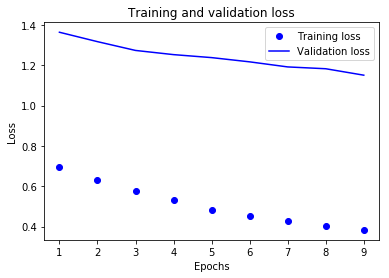

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

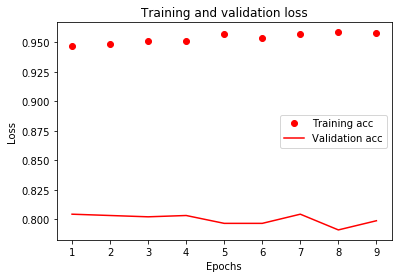

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [3]:
!pip install bayesian-optimization
!pip install keras

     |████████████████████████████████| 317kB 241kB/s eta 0:00:01


In [9]:

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다        
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [21]:
import tensorflow as tf
from tensorflow.keras import models, layers, activations, regularizers, optimizers, losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten, Activation
from tensorflow.python.keras.optimizer_v2 import rmsprop

def get_model(dropoutrate, layer1, layer2, layer3, l11, l21, l12, l22):    
    model = models.Sequential()
    model.add(layer=layers.Dense(layer1, activation=activations.relu, input_shape=(10000, ) ))
    model.add(layer=layers.Dense(layer2, activation=activations.relu, kernel_regularizer=regularizers.L1L2(l1=l11, l2=l21) ))
    model.add(layer=layers.BatchNormalization())
    model.add(layer=layers.Dropout(dropoutrate))
    model.add(layer=layers.Dense(layer3, activation=activations.relu, kernel_regularizer=regularizers.L1L2(l1=l12, l2=l22)))
    model.add(layer=layers.Dense(46, activation=activations.softmax))
    return model

def fit_with(dropoutrate, layer1, layer2, layer3, l11, l21, l12, l22, lr):

    # Create the model using a specified hyperparameters.
    model = get_model(dropoutrate, layer1, layer2, layer3, l11, l21, l12, l22)

    # Train the model for a specified number of epochs.
    optimizer = optimizers.RMSprop(lr=lr)
    model.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])

    # Train the model with the train dataset.
    model.fit(x_train, one_hot_train_labels, epochs=5, batch_size=512)

    # Evaluate the model with the eval dataset.
    score = model.evaluate(x_test, one_hot_test_labels, steps=10, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # Return the accuracy.

    return score[1]


from functools import partial

dropoutrate = 0.5
layer1 = 256
layer2 = 128
layer3 = 64
l11 = 0.001
l21 = 0.01
l12 = 0.001
l22 = 0.01
lr = 0.001

fit_with_partial = partial(fit_with, dropoutrate, layer1, layer2, layer3, l11, l21, l12, l22, lr)

In [22]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'dropoutrate': (0.1, 0.5), 'lr': (1e-4, 1e-2), 'layer1':(128,256), 'layer2':(96,128), 'layer3':(64,96), 'l11':(0.00001, 0.0001), 'l21':(0.0001, 0.01), 'l12':(0.00001, 0.0001), 'l22':(0.0001, 0.01)}

optimizer = BayesianOptimization(
    f=fit_with,
    pbounds=pbounds,
    verbose=2,  # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1,
)


In [24]:

optimizer.maximize(init_points=10, n_iter=10)


|   iter    |  target   | dropou... |    l11    |    l12    |    l21    |    l22    |  layer1   |  layer2   |  layer3   |    lr     |
-------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/5
8982/8982 [==============================] - 1s 78us/sample - loss: 2.0109 - acc: 0.6609
Epoch 2/5
8982/8982 [==============================] - 0s 55us/sample - loss: 0.9970 - acc: 0.8529
Epoch 3/5
8982/8982 [==============================] - 0s 50us/sample - loss: 0.6730 - acc: 0.9094
Epoch 4/5
8982/8982 [==============================] - 0s 55us/sample - loss: 0.5198 - acc: 0.9325
Epoch 5/5
10/10 [==============================] - 1s 68ms/step - loss: 1.7768 - acc: 0.7747
Test loss: 1.7768136262893677
Test accuracy: 0.7747106
|  1        |  0.7747   |  0.2668   |  7.483e-0 |  1.001e-0 |  0.003093 |  0.001553 |  139.8    |  102.0    |  75.06    |  0.004028 |
Epoch 1/5
8982/8982 [==============================] -

8982/8982 [==============================] - 1s 62us/sample - loss: 0.7949 - acc: 0.8884
Epoch 4/5
8982/8982 [==============================] - 0s 55us/sample - loss: 0.5971 - acc: 0.9212
Epoch 5/5
10/10 [==============================] - 1s 81ms/step - loss: 1.4777 - acc: 0.7427
Test loss: 1.4777027368545532
Test accuracy: 0.7426536
|  10       |  0.7427   |  0.3495   |  7.758e-0 |  4.14e-05 |  0.002772 |  0.008969 |  182.8    |  126.9    |  85.23    |  0.006255 |
Epoch 1/5
8982/8982 [==============================] - 1s 90us/sample - loss: 1.9995 - acc: 0.6544
Epoch 2/5
8982/8982 [==============================] - 1s 59us/sample - loss: 0.9546 - acc: 0.8469
Epoch 3/5
8982/8982 [==============================] - 1s 60us/sample - loss: 0.6273 - acc: 0.9077
Epoch 4/5
8982/8982 [==============================] - 1s 58us/sample - loss: 0.4756 - acc: 0.9342
Epoch 5/5
10/10 [==============================] - 1s 78ms/step - loss: 1.6715 - acc: 0.7814
Test loss: 1.6715152263641357
Test accura

Epoch 1/5
8982/8982 [==============================] - 1s 100us/sample - loss: 2.4487 - acc: 0.6407
Epoch 2/5
8982/8982 [==============================] - 0s 50us/sample - loss: 1.2598 - acc: 0.8229
Epoch 3/5
8982/8982 [==============================] - 1s 56us/sample - loss: 0.8418 - acc: 0.8918
Epoch 4/5
8982/8982 [==============================] - 1s 66us/sample - loss: 0.6307 - acc: 0.9223
Epoch 5/5
10/10 [==============================] - 1s 84ms/step - loss: 1.7412 - acc: 0.7596
Test loss: 1.741156816482544
Test accuracy: 0.75957257
|  20       |  0.7596   |  0.4355   |  7.907e-0 |  1.047e-0 |  0.003839 |  0.004399 |  229.3    |  127.9    |  65.43    |  0.004731 |


In [26]:
for i, res in enumerate(optimizer.res):
    print("Iteration {}: \n\t{}".format(i, res))

print(optimizer.max)

Iteration 0: 
	{'target': 0.7747105956077576, 'params': {'dropoutrate': 0.2668088018810296, 'l11': 7.482920440979424e-05, 'l12': 1.0010293733561041e-05, 'l21': 0.003093092469055214, 'l22': 0.0015528833190894193, 'layer1': 139.81934013040612, 'layer2': 101.96032676408547, 'layer3': 75.05794326537753, 'lr': 0.004027997994883633}}
Iteration 1: 
	{'target': 0.7417631149291992, 'params': {'dropoutrate': 0.3155266936013428, 'l11': 4.772750629629653e-05, 'l12': 7.166975503570836e-05, 'l21': 0.0021240772723420225, 'l22': 0.00879336262027036, 'layer1': 131.50561192933455, 'layer2': 117.45496032570887, 'layer3': 77.35375367574807, 'lr': 0.005631029301612942}}
Iteration 2: 
	{'target': 0.7471059560775757, 'params': {'dropoutrate': 0.15615477543809353, 'l11': 2.7829134017639096e-05, 'l12': 8.206701118079831e-05, 'l21': 0.009685789599622036, 'l22': 0.003202899363776504, 'layer1': 216.6172948056722, 'layer2': 124.04445287347323, 'layer3': 92.62741323212312, 'lr': 0.0009419376925608015}}
Iteration 3:

In [23]:
fit_with(dropoutrate, layer1, layer2, layer3, l11, l21, l12, l22, lr)

Epoch 1/5
8982/8982 [==============================] - 1s 82us/sample - loss: 6.6737 - acc: 0.5696
Epoch 2/5
8982/8982 [==============================] - 1s 59us/sample - loss: 4.7002 - acc: 0.7747
Epoch 3/5
8982/8982 [==============================] - 0s 55us/sample - loss: 3.6054 - acc: 0.8395
Epoch 4/5
8982/8982 [==============================] - 0s 55us/sample - loss: 2.8006 - acc: 0.8794
Epoch 5/5
10/10 [==============================] - 1s 75ms/step - loss: 4.1643 - acc: 0.6394
Test loss: 4.164255142211914
Test accuracy: 0.6393589


0.6393589